# Hexmap Practice
Using [this tutorial](https://www.tableau.com/about/blog/2017/1/viz-whiz-hex-tile-maps-64713) by Kevin Taylor and [this data](https://www.kaggle.com/datasets/konivat/us-gun-violence-archive-2014) about U.S. gun violence from 2014 - 2021 to build a hexmap like the one below. 


I will be using a different primary dataset than the one used in the tutorial along with the `hex-ref` used in the tutorioal file to get the positions for the marks.

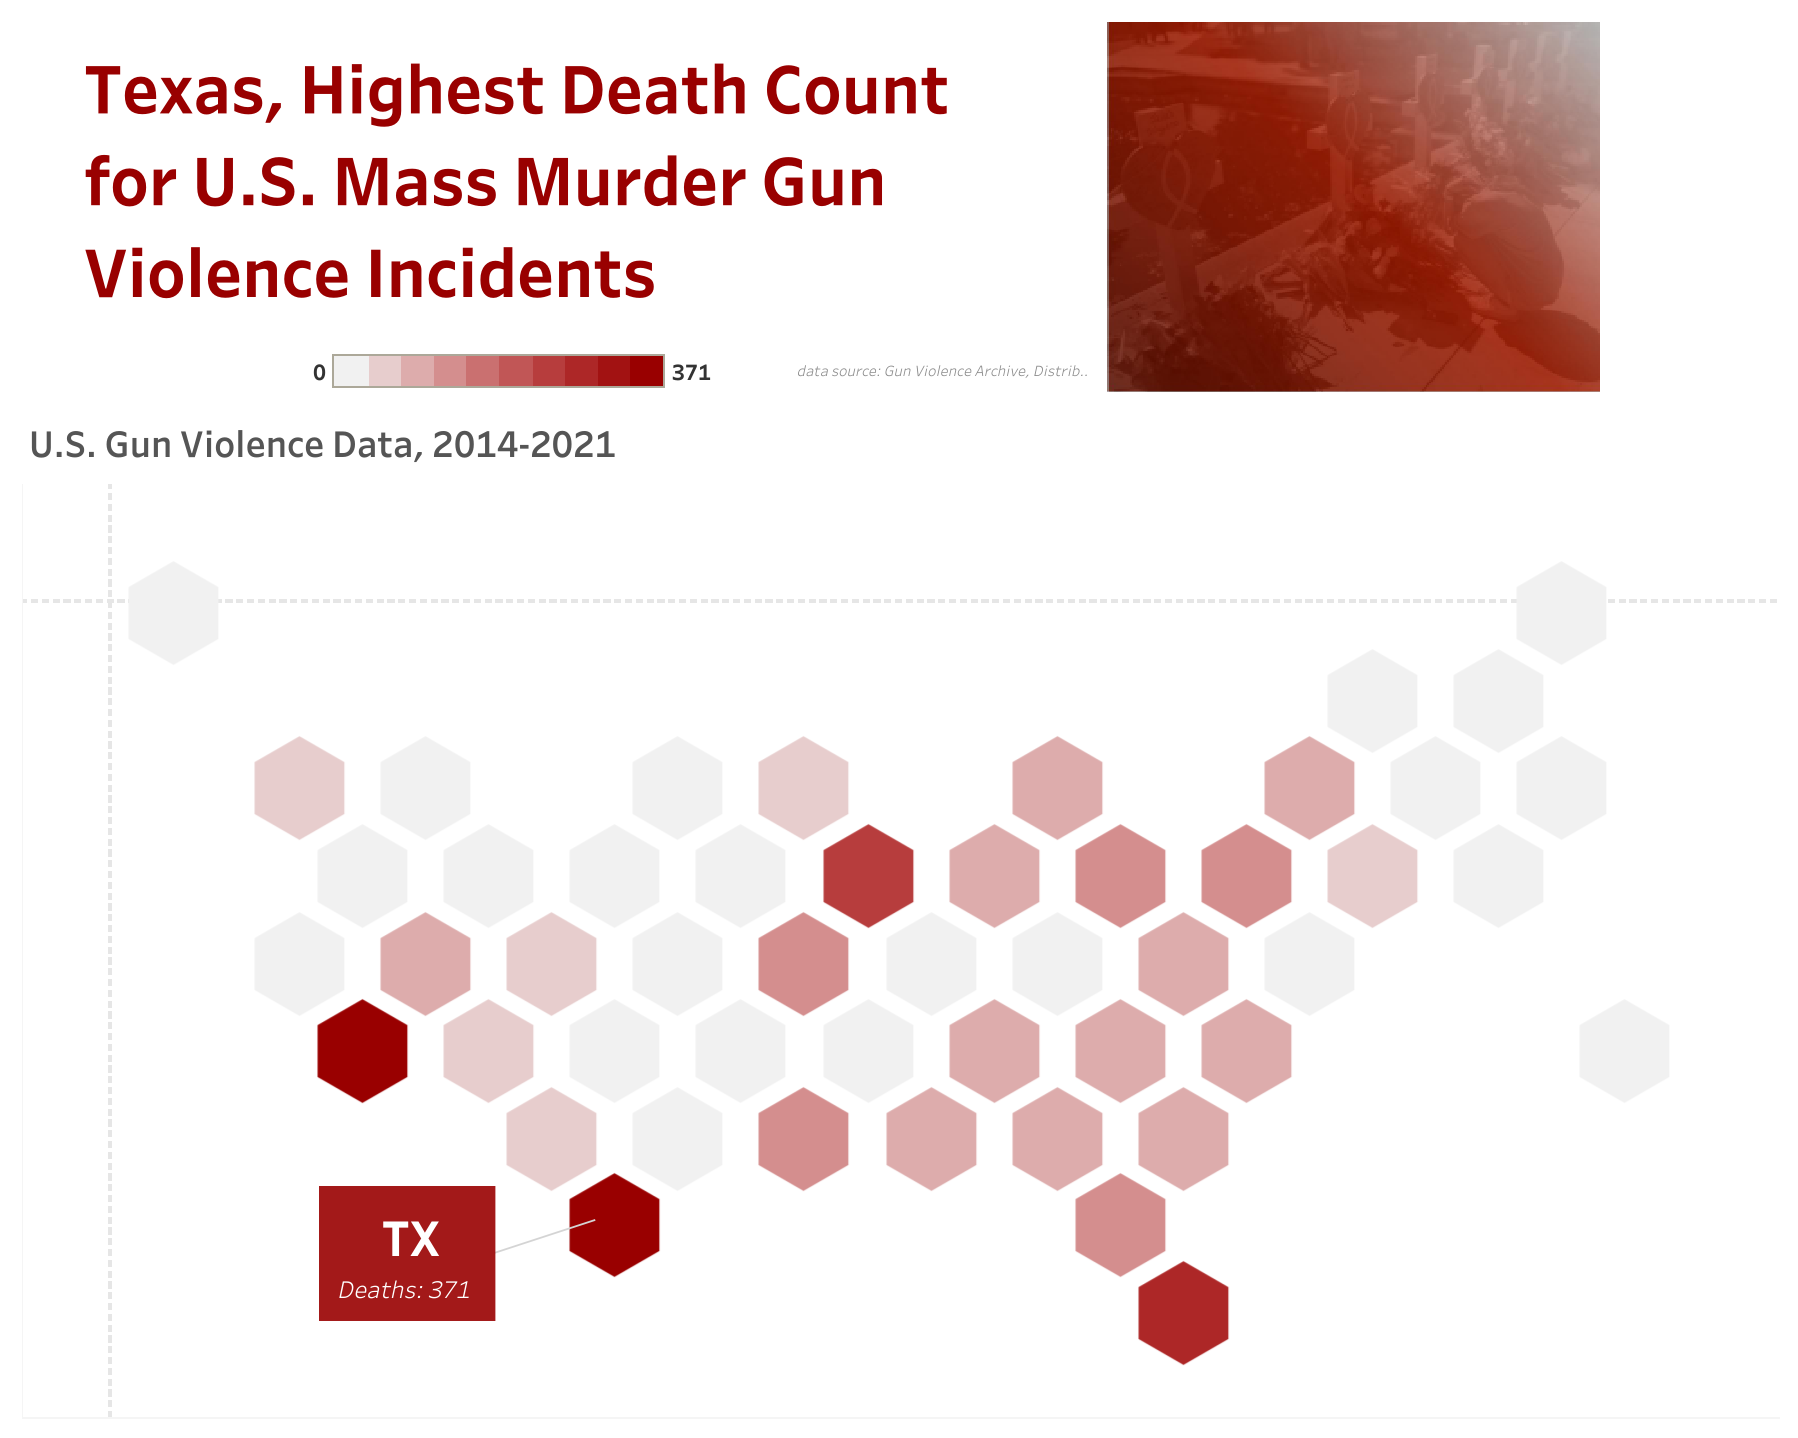
>*viz of the hexp map I made using the gun violence data*

## Best Practices
Common use cases:
- Eliminate the ***Alaska Effect*** where the size of Alaska is mis-represented because of the flat nature of how we view maps
- Eliminate discrepancies in U.S. state sizes
- Provide a more modern web look

Not ideal when:
- Geographical precision is important

## Step 1: Left join your data to the [hexmap plot reference](https://public.tableau.com/s/sites/default/files/media/hexmap_plots.xlsx) data

In [1]:
# importing libraries
import pandas as pd

# bringing in gun violence data
df = pd.read_csv('us-gun-violence_data.csv')
df

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2201535,December 31 2021,Maryland,Capitol Heights,Cindy Ln,0,4.0
1,2201716,December 31 2021,Mississippi,Gulfport,1200 block of Lewis Ave,3,4.0
2,2201216,December 31 2021,California,Los Angeles,10211 S. Avalon Blvd,0,6.0
3,2200968,December 30 2021,Pennsylvania,Philadelphia,5100 block of Germantown Ave,0,6.0
4,2201052,December 30 2021,Missouri,Kirksville,700 block of E Dodson St,2,2.0
...,...,...,...,...,...,...,...
3386,95550,January 12 2014,Alabama,Huntsville,University Drive,0,5.0
3387,95146,January 11 2014,Mississippi,Jackson,3430 W. Capitol Street,0,4.0
3388,94514,January 5 2014,Pennsylvania,Erie,829 Parade St,1,3.0
3389,92704,January 3 2014,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3.0


### Clean up

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     3391 non-null   int64  
 1   incident_date   3391 non-null   object 
 2   state           3391 non-null   object 
 3   city_or_county  3391 non-null   object 
 4   address         3386 non-null   object 
 5   killed          3391 non-null   int64  
 6   injured         3389 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 185.6+ KB


In [3]:
df.isna().sum()

incident_id       0
incident_date     0
state             0
city_or_county    0
address           5
killed            0
injured           2
dtype: int64

In [8]:
df[(df.address.isna() == True) | (df.injured.isna() == True)]

,incident_id,incident_date,state,city_or_county,address,killed,injured
212,2115336,September 5 2021,Missouri,Wyatt,0,4,NaN
268,2089557,August 10 2021,Mississippi,Clarksdale,2,2,NaN
1038,1725735,July 4 2020,South Carolina,Red Oak,NaN,0,5.0
1808,1206476,September 9 2018,Florida,Jacksonville,NaN,0,4.0
2430,716001,December 1 2016,California,Clearlake Oaks,NaN,1,3.0
2879,411888,September 8 2015,Georgia,Berlin,NaN,0,4.0
3342,120621,March 30 2014,Mississippi,Starkville,NaN,0,5.0


### Small enough % nulls so dropping these rows

In [11]:
df.dropna(inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3384 entries, 0 to 3390
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     3384 non-null   int64  
 1   incident_date   3384 non-null   object 
 2   state           3384 non-null   object 
 3   city_or_county  3384 non-null   object 
 4   address         3384 non-null   object 
 5   killed          3384 non-null   int64  
 6   injured         3384 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 211.5+ KB


In [15]:
df.incident_id = df.incident_id.astype(str)

In [17]:
df.incident_date = pd.to_datetime(df.incident_date)

In [19]:
df.drop(columns = ['city_or_county', 'address'], inplace = True)
df

,incident_id,incident_date,state,killed,injured
0,2201535,2021-12-31,Maryland,0,4.0
1,2201716,2021-12-31,Mississippi,3,4.0
2,2201216,2021-12-31,California,0,6.0
3,2200968,2021-12-30,Pennsylvania,0,6.0
4,2201052,2021-12-30,Missouri,2,2.0
...,...,...,...,...,...
3386,95550,2014-01-12,Alabama,0,5.0
3387,95146,2014-01-11,Mississippi,0,4.0
3388,94514,2014-01-05,Pennsylvania,1,3.0
3389,92704,2014-01-03,New York,1,3.0


In [20]:
# bringing in hex reference file
hex_ref = pd.read_csv('../data/0_hexmap-ref.csv')
hex_ref

,Row,Column,State,Abbreviation
0,0,0.5,Alaska,AK
1,6,7.5,Alabama,AL
2,5,6.0,Arkansas,AR
3,5,3.0,Arizona,AZ
4,5,2.0,California,CA
5,4,3.5,Colorado,CO
6,3,11.0,Connecticut,CT
7,5,12.0,District of Columbia,DC
8,4,9.5,Delaware,DE
9,8,8.5,Florida,FL


In [22]:
# merging
df.merge(hex_ref, how = 'left', left_on = 'state', right_on = 'State', indicator = True)

,incident_id,incident_date,state,killed,injured,Row,Column,State,Abbreviation,_merge
0,2201535,2021-12-31,Maryland,0,4.0,4.0,8.5,Maryland,MD,both
1,2201716,2021-12-31,Mississippi,3,4.0,6.0,6.5,Mississippi,MS,both
2,2201216,2021-12-31,California,0,6.0,5.0,2.0,California,CA,both
3,2200968,2021-12-30,Pennsylvania,0,6.0,3.0,9.0,Pennsylvania,PA,both
4,2201052,2021-12-30,Missouri,2,2.0,4.0,5.5,Missouri,MO,both
...,...,...,...,...,...,...,...,...,...,...
3379,95550,2014-01-12,Alabama,0,5.0,6.0,7.5,Alabama,AL,both
3380,95146,2014-01-11,Mississippi,0,4.0,6.0,6.5,Mississippi,MS,both
3381,94514,2014-01-05,Pennsylvania,1,3.0,3.0,9.0,Pennsylvania,PA,both
3382,92704,2014-01-03,New York,1,3.0,NaN,NaN,NaN,NaN,left_only


In [25]:
df.merge(hex_ref, how = 'left', left_on = 'state', right_on = 'State', indicator = True)._merge.value_counts()

both          2236
left_only     1148
right_only       0
Name: _merge, dtype: int64

In [27]:
merge = df.merge(hex_ref, how = 'left', left_on = 'state', right_on = 'State', indicator = True)


,incident_id,incident_date,state,killed,injured,Row,Column,State,Abbreviation,_merge
1944,1131855,2018-06-02,Nebraska,1,6.0,NaN,NaN,NaN,NaN,left_only
356,2052342,2021-07-04,Nebraska,1,4.0,NaN,NaN,NaN,NaN,left_only
3004,348606,2015-05-28,Nebraska,0,4.0,NaN,NaN,NaN,NaN,left_only
1963,1111649,2018-05-09,Nebraska,0,4.0,NaN,NaN,NaN,NaN,left_only
3097,283041,2015-01-24,Nebraska,3,5.0,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
1532,1433857,2019-06-26,Wisconsin,0,4.0,NaN,NaN,NaN,NaN,left_only
122,2144160,2021-10-17,Wisconsin,0,6.0,NaN,NaN,NaN,NaN,left_only
117,2145931,2021-10-19,Wisconsin,3,2.0,NaN,NaN,NaN,NaN,left_only
1205,1666945,2020-04-27,Wisconsin,5,0.0,NaN,NaN,NaN,NaN,left_only


In [35]:
merge[merge._merge == 'left_only'].sort_values(by = 'state').state.value_counts()

Texas             221
New York          159
Ohio              136
Tennessee         109
North Carolina     94
New Jersey         84
South Carolina     82
Virginia           77
Wisconsin          37
Washington         34
Nevada             26
Oklahoma           22
New Mexico         20
Oregon             16
Nebraska           10
Utah                6
West Virginia       5
Rhode Island        4
South Dakota        4
Vermont             1
New Hampshire       1
Name: state, dtype: int64

In [34]:
# hex_ref[hex_ref.State == 'Nebraska']
merge[merge.state == 'Nebraska']


,incident_id,incident_date,state,killed,injured,Row,Column,State,Abbreviation,_merge
356,2052342,2021-07-04,Nebraska,1,4.0,NaN,NaN,NaN,NaN,left_only
732,1858965,2020-11-21,Nebraska,2,2.0,NaN,NaN,NaN,NaN,left_only
994,1739571,2020-07-19,Nebraska,0,8.0,NaN,NaN,NaN,NaN,left_only
1595,1400934,2019-05-18,Nebraska,0,4.0,NaN,NaN,NaN,NaN,left_only
1944,1131855,2018-06-02,Nebraska,1,6.0,NaN,NaN,NaN,NaN,left_only
1958,1114276,2018-05-12,Nebraska,0,6.0,NaN,NaN,NaN,NaN,left_only
1963,1111649,2018-05-09,Nebraska,0,4.0,NaN,NaN,NaN,NaN,left_only
2798,460386,2015-12-06,Nebraska,2,3.0,NaN,NaN,NaN,NaN,left_only
3004,348606,2015-05-28,Nebraska,0,4.0,NaN,NaN,NaN,NaN,left_only
3097,283041,2015-01-24,Nebraska,3,5.0,NaN,NaN,NaN,NaN,left_only


In [33]:
hex_ref.State.value_counts()

Iowa                    1
Massachusetts           1
North Carolina          1
Utah                    1
District of Columbia    1
Colorado                1
New Hampshire           1
Missouri                1
Florida                 1
Maine                   1
Idaho                   1
Tennessee               1
Kentucky                1
Texas                   1
New York                1
Alaska                  1
Montana                 1
Pennsylvania            1
Nevada                  1
South Carolina          1
Nebraska                1
Kansas                  1
Mississippi             1
Ohio                    1
Rhode Island            1
Delaware                1
Oklahoma                1
Wyoming                 1
New Jersey              1
Arkansas                1
Maryland                1
North Dakota            1
Wisconsin               1
Vermont                 1
Oregon                  1
Michigan                1
Arizona                 1
Illinois                1
Hawaii      

In [38]:
hex_ref.State = hex_ref.State.str.strip()

In [42]:
merged = df.merge(hex_ref, how = 'left', left_on = 'state', right_on = 'State', indicator = True)
merged.drop(columns = ['State', '_merge'], inplace = True)

merged

,incident_id,incident_date,state,killed,injured,Row,Column,Abbreviation
0,2201535,2021-12-31,Maryland,0,4.0,4,8.5,MD
1,2201716,2021-12-31,Mississippi,3,4.0,6,6.5,MS
2,2201216,2021-12-31,California,0,6.0,5,2.0,CA
3,2200968,2021-12-30,Pennsylvania,0,6.0,3,9.0,PA
4,2201052,2021-12-30,Missouri,2,2.0,4,5.5,MO
...,...,...,...,...,...,...,...,...
3379,95550,2014-01-12,Alabama,0,5.0,6,7.5,AL
3380,95146,2014-01-11,Mississippi,0,4.0,6,6.5,MS
3381,94514,2014-01-05,Pennsylvania,1,3.0,3,9.0,PA
3382,92704,2014-01-03,New York,1,3.0,2,9.5,NY


In [44]:
merged.to_csv('cleaned_hex-data.csv')

In [46]:
merged[merged.Abbreviation == 'VA'].killed.mean()

0.987012987012987